In [1]:
using Plots
using DifferentialEquations

In [142]:
include("../dynamics/dynamics.jl")
include("../adaptive_control/adaptive_control.jl");

# Set up simple manipulator passive

In [10]:
# Initial conditions set in the book
m1 = 1; l1 = 1;
me = 2; de = pi/6;
I1 = 0.12; lc1 = 0.5;
Ie = 0.25; lce = 0.6;
b1 = 0.; b2 = 0.;
g = 9.81;

# No control
τ(t,state) = [0.; 0.];

p = [m1; l1; me; de; I1; lc1; Ie; lce; b1; b2; g; τ]

# Time span
tspan = (0.0, 10.0)

# Initial Conditions
x0 = [0.; 0.; 0.; 0.]

prob = ODEProblem(dynamics.manipulator_load, x0, tspan, p);

In [11]:
sol = solve(prob, Vern7(),reltol=1e-8, abstol=1e-8);

In [ ]:
sol

# PD Control

In [51]:
# Initial conditions set in the book
m1 = 1; l1 = 1;
me = 2; de = pi/6;
I1 = 0.12; lc1 = 0.5;
Ie = 0.25; lce = 0.6;
b1 = 0.; b2 = 0.;
g = 9.81;

# PD control to (pi/3,pi/2)
qd = [pi/3; pi/2]

# Gain Matricies
Kd = 100*eye(2)
Kp = 20*Kp

# Controller
pd_control(t,state) = - Kp*(state[1:2] - qd) - Kd*state[3:4];

p1 = [m1, l1, me, de, I1, lc1, Ie, lce, b1, b2, g, pd_control]

# Time span
tspan = (0.0, 1.0)

# Initial Conditions
x0 = [0.; 0.; 0.; 0.]

prob = ODEProblem(dynamics.manipulator_load, x0, tspan, p1);

In [52]:
sol = solve(prob, Vern7(),reltol=1e-8, abstol=1e-8);

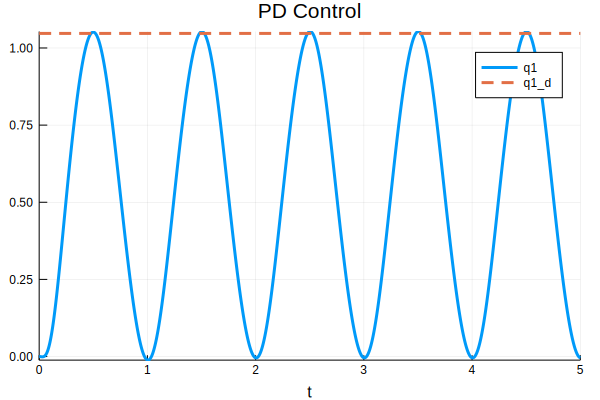

In [154]:
p1 = plot(sol, vars=(0,1),label=["q1"])
plot!(sol.t, qd[1]*ones(size(sol.t)),label="q1_d", line=(3, :dash))


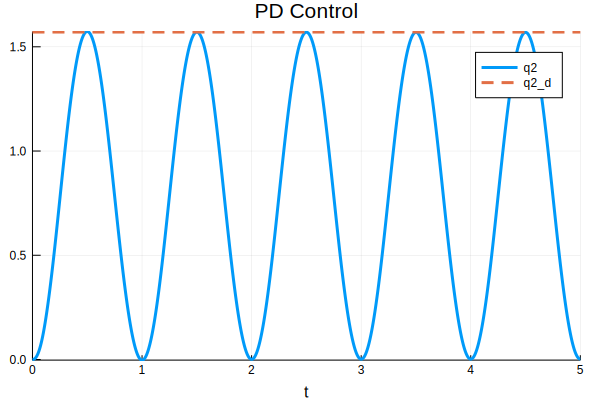

In [153]:
p2 = plot(sol, vars=(0,2), label=["q2"])
plot!(sol.t, qd[2]*ones(size(sol.t)),label="q2_d", line=(3, :dash))

In [ ]:
plot(p1, p2, layout=2)

In [ ]:
# Animate the dynamics

x0 = [0.;0.]

xl1 = [l1*cos()

anim = @animate for i = 1:length()
    # Plot the current position
    plot([x0[1],xl1[1][i]], [x0[2],xl1[2][i]], xlim=(-2.0,2.0), ylim=(-2.0, 2.0),linewidth=5)
    plot!([xl1[1][i],xl2[1][i]], [xl1[2][i],xl2[2][i]], xlim=(-2.0,2.0), ylim=(-2.0, 2.0),linewidth=5)

end

In [28]:
sol.u[:][1]

4-element Array{Float64,1}:
 0.0
 0.0
 0.0
 0.0

# Adaptive Control

In [143]:
# Initial conditions set in the book
m1 = 1; l1 = 1;
me = 2; de = pi/6;
I1 = 0.12; lc1 = 0.5;
Ie = 0.25; lce = 0.6;
b1 = 0.; b2 = 0.;
g = 9.81;

# Convergence properties
lambda = 20*eye(2)
Kd = 100*eye(2)
gamma  = diagm([0.03;0.05;0.1;0.3])

# Controller
adapt_control(t, state) = adaptive_control.adaptive_control_law(t, state,lambda, Kd)
adapt_law(t, state)     = adaptive_control.adaptation_law_arm(t, state,lambda, gamma)

p2 = [m1, l1, me, de, I1, lc1, Ie, lce, b1, b2, g, adapt_control, adapt_law]

# Time span
tspan = (0.0, 5.0)

# Initial Conditions
a_hat_0 = [0.;0.;0.;0.]
x0 = [0.; 0.; 0.; 0.; a_hat_0]

prob = ODEProblem(dynamics.manipulator_adaptive, x0, tspan, p2);

In [144]:
du = x0
u  = x0
t = 1.0
dynamics.manipulator_adaptive(du, u, p2, t)


-4.0447664964179994e-13

In [145]:
sol = solve(prob,reltol=1e-8, abstol=1e-8);

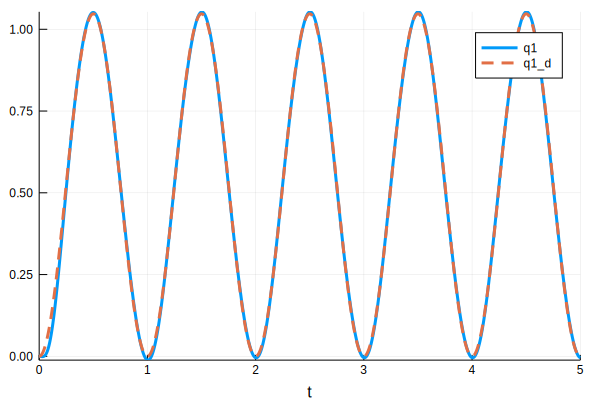

In [169]:
p1 = plot(sol, vars=(0,1), label=["q1"])
plot!(sol.t, (pi/6)*(1-cos.(2*pi*sol.t)),label="q1_d", line=(3, :dash))

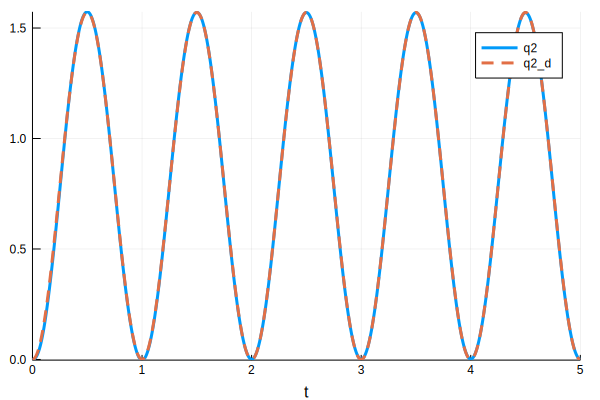

In [170]:
p2 = plot(sol, vars=(0,2), label=["q2"])
plot!(sol.t, (pi/4)*(1-cos.(2*pi*sol.t)),label="q2_d", line=(3, :dash))

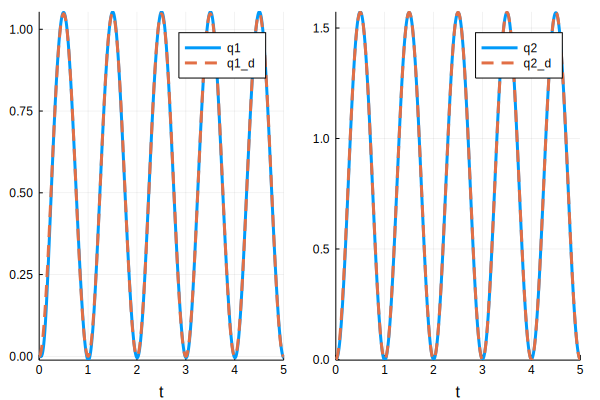

In [171]:
plot(p1, p2, layout=2)

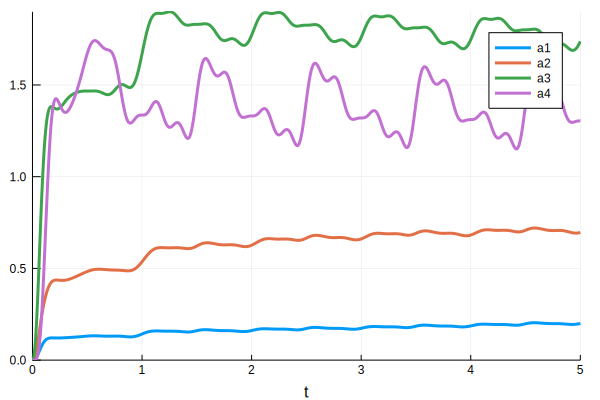

In [175]:
plot(sol, vars=(0, [3,4,5,6]), labels=["a1" "a2" "a3" "a4"])
# plot(sol.t, )

In [ ]:
# Animate the dynamics

x0 = [0.;0.]

xl1 = [l1*cos()

anim = @animate for i = 1:length()
    # Plot the current position
    plot([x0[1],xl1[1][i]], [x0[2],xl1[2][i]], xlim=(-2.0,2.0), ylim=(-2.0, 2.0),linewidth=5)
    plot!([xl1[1][i],xl2[1][i]], [xl1[2][i],xl2[2][i]], xlim=(-2.0,2.0), ylim=(-2.0, 2.0),linewidth=5)

end